In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

sns.set_theme()


In [18]:
N_vals = [10, 50, 100]
dfs = []

for N in N_vals:
    path = f"output/interactions_gradient_N={N}.csv"
    df = pd.read_csv(path)
    dfs.append(df)


<AxesSubplot:>

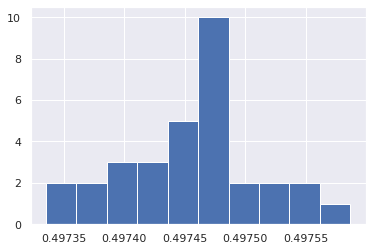

In [19]:
dfs[0]["alpha"].hist()

In [20]:
for N, df in zip(N_vals, dfs):
    print(f"N={N}, mean={df['alpha'].mean()}, std={df['alpha'].std()}")

N=10, mean=0.49745384375, std=5.8375928189070054e-05
N=50, mean=0.48920212500000004, std=0.0005835804253941593
N=100, mean=0.48308106250000005, std=0.001142403463487004


N=10, standard error=1.0029681626983636e-05
N=50, standard error=0.00010191920718980318
N=100, standard error=0.00019903984528563216


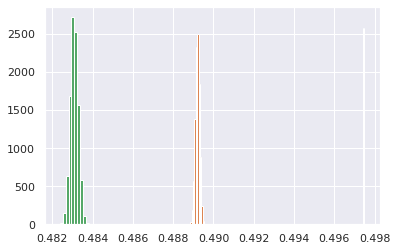

In [21]:
# bootstrap

B = 10000
for N, df in zip(N_vals, dfs):
    alphas = []
    for b in range(B):
        sample = df.sample(frac=1, replace=True)
        alphas.append(sample["alpha"].mean())
    alphas = np.array(alphas)
    plt.hist(alphas)
    print(f"N={N}, standard error={alphas.std()}")


In [22]:
alphas = [df["alpha"].mean() for df in dfs]
print(alphas)

[0.49745384375, 0.48920212500000004, 0.48308106250000005]


## Energy

In [23]:
N_vals = [10, 50, 100]
dfs = []

for N in N_vals:
    print(". ", end="")
    path = f"output/energy_statistics_N={N}_d=3_interactions.csv"
    df = pd.read_csv(path, header=None)
    dfs.append(df)


. . . 

In [24]:
from src.statistical_analysis import block

In [25]:
means = []
std_errors = []

for N, df in zip(N_vals, dfs):
    mean_N = df.mean()[0]
    std_error_N = np.sqrt(block(df.to_numpy()))
    print(f"N={N}, mean={mean_N}, std={std_error_N}")
    means.append(mean_N)
    std_errors.append(std_error_N)


N=10, mean=24.398378697479085, std=3.660636676382886e-05
N=50, mean=127.26035012556866, std=0.0002974330649635992
N=100, mean=266.19135302256825, std=0.000651738092338933


In [26]:
for i in range(3):
    print(means[i]/N_vals[i])

2.4398378697479086
2.5452070025113733
2.6619135302256827


## Densities

In [27]:
dfs = []
N_list = [10, 50, 100]

for N in N_list:
    path = f"output/density_N={N}.csv"
    df = pd.read_csv(path, header=None, delim_whitespace=True)
    # set header to x, y, z
    df.columns = ["x", "y", "z"]
    df["r"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
    dfs.append(df)



In [28]:
dfs[0]

,x,y,z,r
0,0.2899,0.7852,-0.5198,0.985278
1,0.3530,-0.3160,0.2411,0.531596
2,-1.3425,-0.2668,0.1431,1.376214
3,-0.1559,-0.0682,0.6148,0.637915
4,0.7293,0.5217,-0.5277,1.040441
...,...,...,...,...
16777275,0.1636,-0.3174,-0.0751,0.364894
16777276,-0.2635,0.3518,0.2742,0.518055
16777277,-1.8241,0.4114,-0.5113,1.938561
16777278,0.9828,1.1234,0.1886,1.504491


non-interactive

<AxesSubplot:>

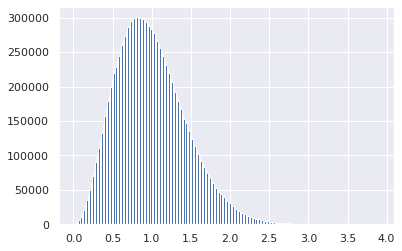

In [29]:
df_new = pd.read_csv("output/density_N=5.csv", header=None, delim_whitespace=True)
df_new.columns = ["x", "y", "z"]
df_new["r"] = np.sqrt(df_new["x"]**2 + df_new["y"]**2 + df_new["z"]**2)
df_new["r"].hist(bins=200)

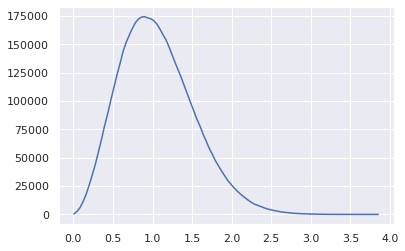

In [38]:
density, bins = np.histogram(dfs[2]["r"], bins=100)
bins = bins[:-1]
plt.plot(bins, density)

['Non-interactive', 'N=10', 'N=50', 'N=100']


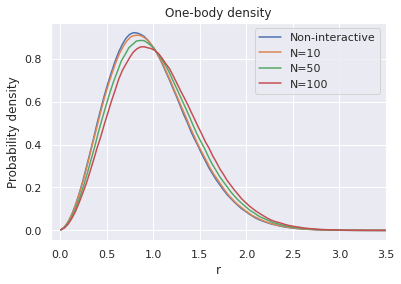

In [43]:
density, bins = np.histogram(df_new["r"], bins=100, density=True)
plt.plot(bins[:-1], density)


for i in range(3):
    density, bins = np.histogram(dfs[i]["r"], bins=100, density=True)
    plt.plot(bins[:-1], density)


print(["Non-interactive"]+ ["N=" + str(N) for N in N_list])
plt.legend(["Non-interactive"]+ ["N=" + str(N) for N in N_list])
# set length of x-axis
plt.xlim(-0.1, 3.5)
plt.title("One-body density")
plt.xlabel("r")
plt.ylabel("Probability density")
plt.savefig("Results/onebody.pdf")
plt.show()
